In [342]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from timeit import default_timer

Definimos la función nearest_neighbor que toma tres argumentos: la ciudad actual (curr_city), una lista de ciudades no visitadas (unvisited_cities), y la matriz de distancias entre ciudades (distance_matrix). Esta función se encargará de encontrar la ciudad no visitada más cercana a la ciudad actual.

In [343]:
def nearest_neighbor(curr_city, unvisited_cities, distance_matrix):
    min_distance = float('inf')
    nearest_city = None

#Inicializamos la variable min_distance con un valor infinito positivo y nearest_city como None, ya que aún no hemos encontrado la ciudad más cercana.

    for city in unvisited_cities:
        dist = distance_matrix[curr_city][city]
        if dist < min_distance:
            min_distance = dist
            nearest_city = city

#Inicializamos la variable min_distance con un valor infinito positivo y nearest_city como None, ya que aún no hemos encontrado la ciudad más cercana.

    #print('ciudad_visitada ', nearest_city, 'distancie ', dist )
    return nearest_city, min_distance

Definimos la función nearest_neighbor_algorithm que toma como argumento la matriz de distancias entre ciudades (distance_matrix). Esta función implementará el algoritmo completo del vecino más cercano.

In [344]:
def nearest_neighbor_algorithm(distance_matrix):
    num_cities = len(distance_matrix)
    visited = [False] * num_cities
    tour = []
    total_distance = 0

#Calculamos la cantidad total de ciudades (num_cities) basándonos en la longitud de la matriz de distancias. Creamos una lista llamada visited para llevar un registro de qué ciudades han sido visitadas y la inicializamos con False. Creamos una lista llamada tour que almacenará el recorrido y una variable total_distance que mantendrá la distancia total del recorrido.

    current_city = 0  # Comenzamos desde la ciudad 0
    tour.append(current_city)
    visited[current_city] = True

#Comenzamos el recorrido desde la ciudad 0 (puedes modificar esto según tu caso). Añadimos la ciudad inicial a la lista tour y marcamos la ciudad como visitada en la lista visited.

    for _ in range(num_cities - 1):
#Iniciamos un bucle que se ejecutará para todas las ciudades excepto la inicial.
        next_city, dist = nearest_neighbor(current_city, [city for city in range(num_cities) if not visited[city]], distance_matrix)
#Llamamos a la función nearest_neighbor para encontrar la próxima ciudad más cercana a current_city entre las ciudades no visitadas. Obtenemos tanto la ciudad más cercana (next_city) como la distancia mínima (dist) hasta esa ciudad.
        #print(next_city, dist)
        total_distance += dist
        current_city = next_city
        tour.append(current_city)
        visited[current_city] = True
#Agregamos la distancia mínima (dist) a la total_distance. Actualizamos current_city a next_city, agregamos next_city a tour y marcamos next_city como visitada.

    total_distance += distance_matrix[tour[-1]][tour[0]]  # Regresar a la ciudad de inicio
#Después de haber recorrido todas las ciudades, añadimos la distancia de regreso desde la última ciudad visitada hasta la ciudad inicial, cerrando el ciclo.

    return tour, total_distance

Definimos la funcion generate_disyance_matrix, que genera una matriz de distancias de manera aleatoria segun el numero de ciudades.

In [345]:
def generate_distance_matrix(num_cities):
    np.random.seed(42)
    distances = np.random.randint(10, 100, size=(num_cities, num_cities))
    np.fill_diagonal(distances, 0)  # Las distancias de una ciudad a sí misma son 0
    return distances



Creamos la matriz aleatoria

In [346]:
num_cities = 6  # Número de ciudades
distance_matrix = generate_distance_matrix(num_cities)
print("Matriz de distancias entre ciudades:\n", distance_matrix)

Matriz de distancias entre ciudades:
 [[ 0 24 81 70 30 92]
 [96  0 84 97 33 12]
 [31 62  0 97 39 47]
 [11 73 69  0 42 85]
 [67 31 98 58  0 51]
 [69 89 24 71 71  0]]


Ejecución del algoritno NN, en este punto podemos usar el grafo dejado en clase o usar la matriz aleatoria creada arriba

In [347]:
# Matriz de distancias entre ciudades (ejemplo)
#distance_matrix = np.array([
#   [0,113,147,167,56], # Grand Rapids
#    [113,0,98,142,137], # Saginaw
#    [147,98,0,58,135], # Detroit
#    [167,142,58,0,133], # Toledo
#    [56,137,135,133,0]  # Kalamazoo
#])

inicio_run = default_timer()
tour, total_distance = nearest_neighbor_algorithm(distance_matrix)
fin_run = default_timer()
tiempo_run = fin_run-inicio_run

print("Tour:", tour)
print("Total Distance:", total_distance)
print("Tiempo:", tiempo_run)

Tour: [0, 1, 5, 2, 4, 3]
Total Distance: 168
Tiempo: 0.00014346999523695558


Dibujamos el grafo inicial del problema, puede ser cualquier grafo definido arriba

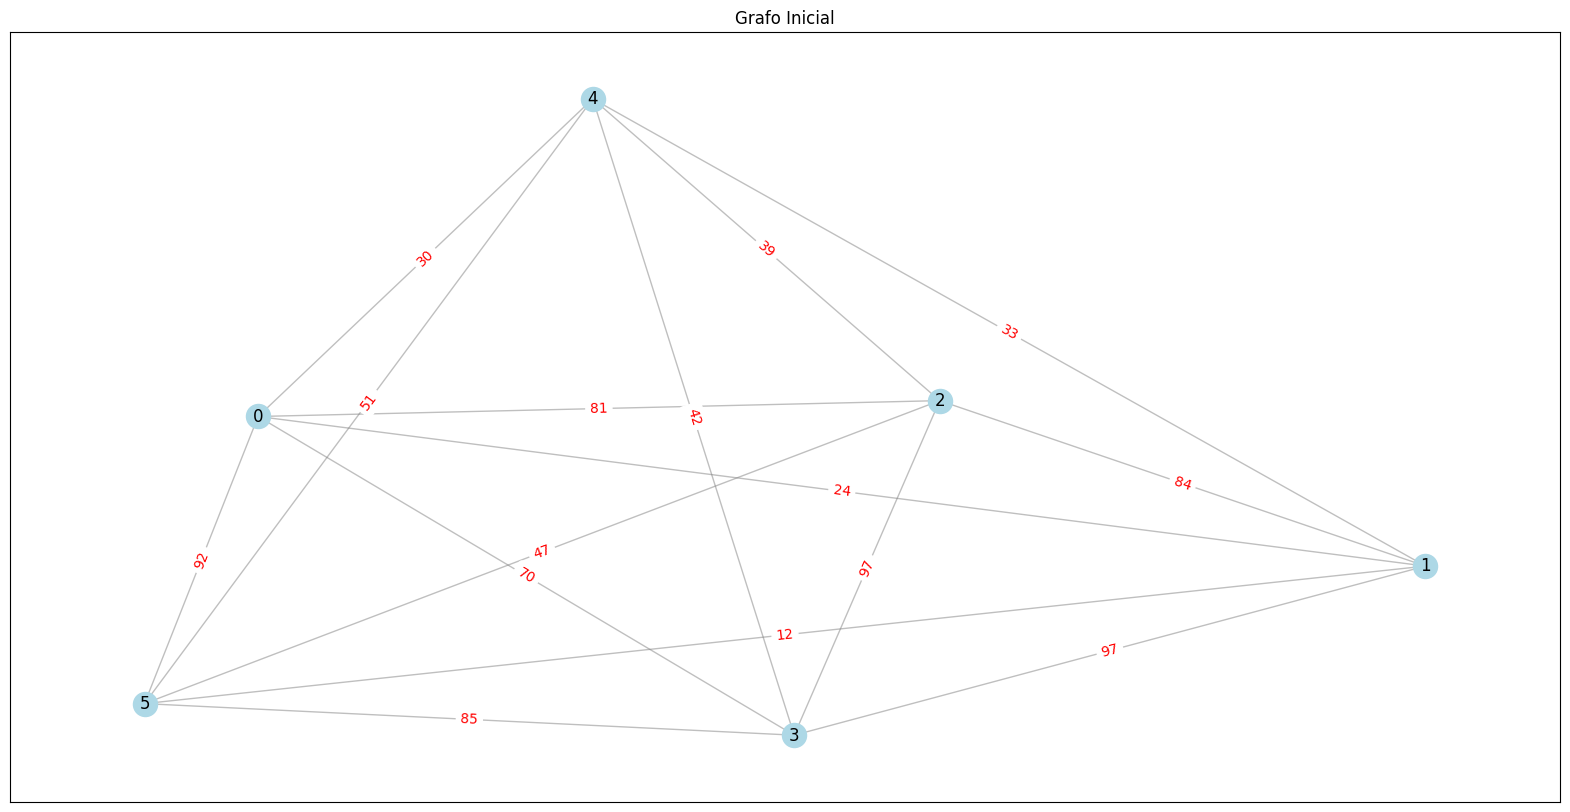

In [348]:
G_initial = nx.Graph()

# Agregar nodos y conexiones en el grafo inicial
for i in range(len(distance_matrix)):
    for j in range(i + 1, len(distance_matrix)):
        G_initial.add_edge(i, j, weight=distance_matrix[i][j])

pos_initial = nx.spring_layout(G_initial)

plt.figure(figsize=(20, 10))

# Dibujar el grafo inicial
nx.draw_networkx_nodes(G_initial, pos_initial, node_color='lightblue')
nx.draw_networkx_labels(G_initial, pos_initial)
nx.draw_networkx_edges(G_initial, pos_initial, width=1, alpha=0.5, edge_color='gray', arrows=False)

edge_labels_initial = nx.get_edge_attributes(G_initial, 'weight')
nx.draw_networkx_edge_labels(G_initial, pos_initial, edge_labels=edge_labels_initial, font_color='red')

plt.title('Grafo Inicial')
plt.show()

Dibujamos la mejor ruta conservando la forma del grafo inicial

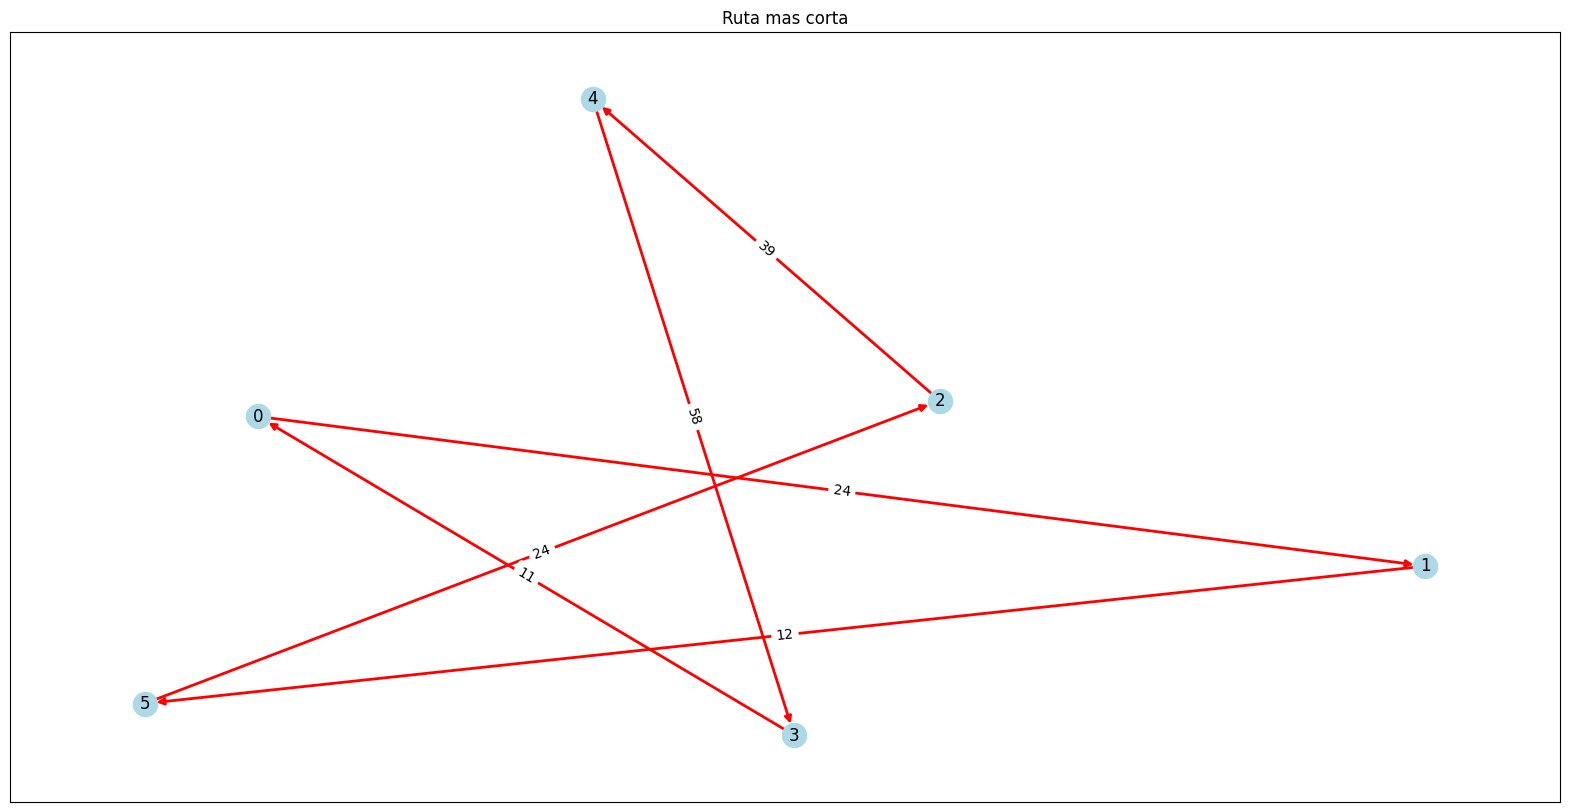

Tour: [0, 1, 5, 2, 4, 3]
Total Distance: 168
Tiempo: 0.00014346999523695558


In [349]:
G_solution = nx.DiGraph()

# Agregar nodos y conexiones en el grafo
for i in range(len(tour) - 1):
    G_solution.add_edge(tour[i], tour[i + 1], weight=distance_matrix[tour[i]][tour[i + 1]])

G_solution.add_edge(tour[-1], tour[0], weight=distance_matrix[tour[-1]][tour[0]])

# Utilizamos las posiciones del grafo inicial para el grafo de solución
pos_solution = pos_initial

plt.figure(figsize=(20, 10))

# grafo de solución
nx.draw_networkx_nodes(G_solution, pos_solution, node_color='lightblue')
nx.draw_networkx_labels(G_solution, pos_solution)
nx.draw_networkx_edges(G_solution, pos_solution, edgelist=G_solution.edges(), width=2, edge_color='red', arrows=True)

edge_labels_solution = {(i, j): distance_matrix[i][j] for i, j in G_solution.edges()}
nx.draw_networkx_edge_labels(G_solution, pos_solution, edge_labels=edge_labels_solution, font_color='black', )

plt.title('Ruta mas corta')
plt.show()
print("Tour:", tour)
print("Total Distance:", total_distance)
print("Tiempo:", tiempo_run)

Dibujamos el grafo, mostrando el mejor ciclo Hamiltoniano

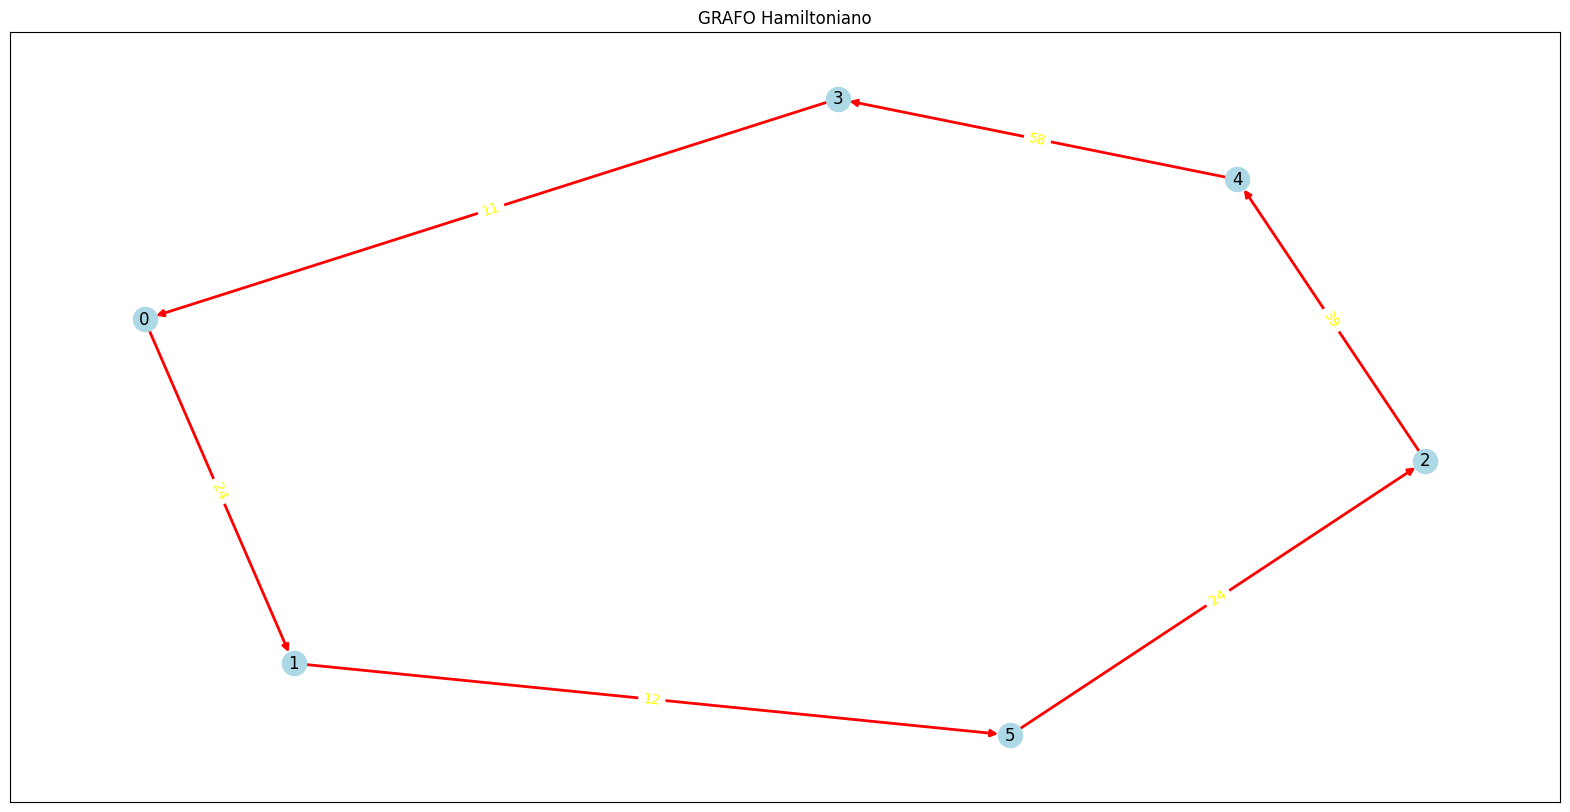

Tour: [0, 1, 5, 2, 4, 3]
Total Distance: 168
Tiempo: 0.00014346999523695558


In [350]:
G_solution = nx.DiGraph()

# Agregar nodos y conexiones en el grafo
for i in range(len(tour) - 1):
    G_solution.add_edge(tour[i], tour[i + 1], weight=distance_matrix[tour[i]][tour[i + 1]])

G_solution.add_edge(tour[-1], tour[0], weight=distance_matrix[tour[-1]][tour[0]])

pos_solution = nx.spring_layout(G_solution)

plt.figure(figsize=(20, 10))

# grafo de solución
nx.draw_networkx_nodes(G_solution, pos_solution, node_color='lightblue')
nx.draw_networkx_labels(G_solution, pos_solution)
nx.draw_networkx_edges(G_solution, pos_solution, edgelist=G_solution.edges(), width=2, edge_color='red', arrows=True)

edge_labels_solution = {(i, j): distance_matrix[i][j] for i, j in G_solution.edges()}
nx.draw_networkx_edge_labels(G_solution, pos_solution, edge_labels=edge_labels_solution, font_color='yellow')

plt.title('GRAFO Hamiltoniano')
plt.show()
print("Tour:", tour)
print("Total Distance:", total_distance)
print("Tiempo:", tiempo_run)